## New Yorkk Subway data
Simple EDA done on New York subway dataset .. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Dataset

In [2]:
subway_data = pd.read_csv('nyc_subway_weather.csv')
# add a dummy variable
subway_data['e'] = 1
subway_data.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon,e
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177,1
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177,1
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177,1
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177,1
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177,1


### Dataset info
The dataset have 27 columns as shown below.
More inforamtion in the PDF. 

In [3]:
subway_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42649 entries, 0 to 42648
Data columns (total 28 columns):
UNIT               42649 non-null object
DATEn              42649 non-null object
TIMEn              42649 non-null object
ENTRIESn           42649 non-null int64
EXITSn             42649 non-null int64
ENTRIESn_hourly    42649 non-null float64
EXITSn_hourly      42649 non-null float64
datetime           42649 non-null object
hour               42649 non-null int64
day_week           42649 non-null int64
weekday            42649 non-null int64
station            42649 non-null object
latitude           42649 non-null float64
longitude          42649 non-null float64
conds              42649 non-null object
fog                42649 non-null int64
precipi            42649 non-null float64
pressurei          42649 non-null float64
rain               42649 non-null int64
tempi              42649 non-null float64
wspdi              42649 non-null float64
meanprecipi        42649 non-

In [4]:
# Replacing day_week values with Days name
dic_days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
subway_data['day_week'] = subway_data['day_week'].map(dic_days)

In [5]:
# groupby  hour
g_byHour = subway_data.groupby(by = ['day_week', 'hour'])['e'].sum().unstack()
g_byHour

hour,0,4,8,12,16,20
day_week,,,,,,
Fri,951,948,727,944,938,942
Mon,1190,1194,1078,1184,1175,1189
Sat,950,953,658,947,950,952
Sun,1192,1187,829,1185,1184,1192
Thu,953,955,734,951,946,946
Tue,1195,1192,1139,1177,1165,1175
Wed,947,952,749,947,940,947


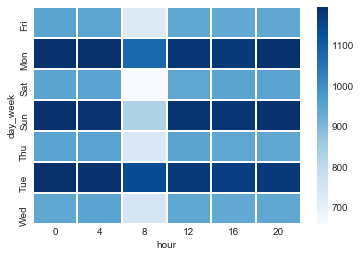

In [6]:
sns.heatmap(g_byHour,linewidths=1,cmap = 'Blues')

      ENTRIESn_hourly  EXITSn_hourly
hour                                
0         1403.248441    1119.521415
4          311.717653     299.966942
8          879.029929     527.669428
12        3010.949693    2216.044035
16        2306.527816    1592.556180
20        3226.240093    2259.895955


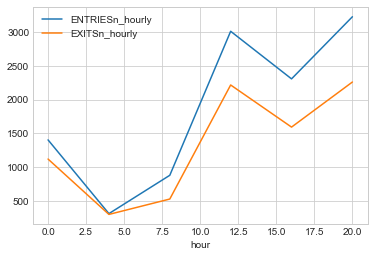

In [8]:
# Grouping Entries based on Different Time for further analysis
group_hourly = subway_data.groupby('hour')
x = group_hourly['ENTRIESn_hourly','EXITSn_hourly'].mean()
sns.barplot
print (x)
x.plot()

Text(0, 0.5, 'riders')

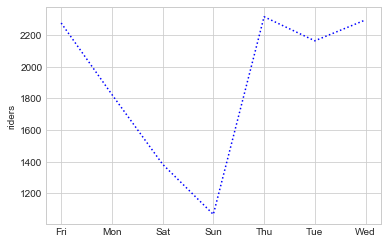

In [9]:
# Mean hourly entry day-wise
group_day = subway_data.groupby('day_week')
entries_daily = group_day['ENTRIESn_hourly'].mean()
plt.plot(entries_daily,'b:')
plt.ylabel('riders')

In [10]:
rain_df = subway_data.groupby(['rain','day_week'], as_index=False)
s = rain_df['ENTRIESn_hourly'].mean()
print(s.iloc[0:7]['day_week'])
print(s.iloc[0:7]['ENTRIESn_hourly'])
s

0    Fri
1    Mon
2    Sat
3    Sun
4    Thu
5    Tue
6    Wed
Name: day_week, dtype: object
0    2274.958944
1    1792.143970
2    1388.219575
3    1074.015694
4    2264.874673
5    2171.126911
6    2313.388767
Name: ENTRIESn_hourly, dtype: float64


,rain,day_week,ENTRIESn_hourly
0,0,Fri,2274.958944
1,0,Mon,1792.143970
2,0,Sat,1388.219575
3,0,Sun,1074.015694
4,0,Thu,2264.874673
5,0,Tue,2171.126911
6,0,Wed,2313.388767
7,1,Fri,2284.644330
8,1,Mon,1948.177419
9,1,Sat,1317.855422


Text(0.5, 0, 'rain')

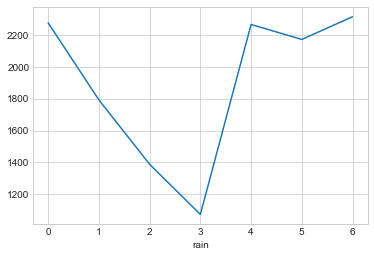

In [11]:
plt.plot(s.iloc[0:7]['ENTRIESn_hourly'])
plt.xlabel('rain')

Text(0.5, 0, 'no_rain')

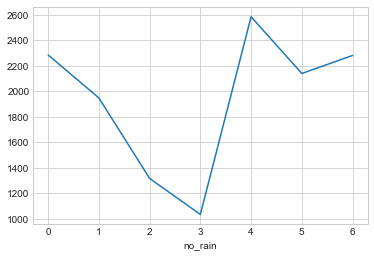

In [12]:
plt.plot(range(0,7),s.iloc[7:14]['ENTRIESn_hourly'])
plt.xlabel('no_rain')

In [13]:
#scatter plot

data_by_loc = subway_data.groupby(['latitude','longitude'],as_index = False).mean()
data_by_loc.head()


,latitude,longitude,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,weekday,fog,precipi,...,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon,e
0,40.576152,-73.975925,9.659049e+06,8.641132e+06,403.896175,325.956284,10.032787,0.715847,0.010929,0.006284,...,0.229508,63.383607,5.553005,0.006284,29.972568,63.383607,5.553005,40.603489,-73.958763,1.0
1,40.576298,-73.968523,8.306897e+06,6.646823e+06,526.697297,419.562162,9.989189,0.708108,0.010811,0.006216,...,0.227027,63.375135,5.517838,0.006216,29.973297,63.375135,5.517838,40.603489,-73.958763,1.0
2,40.577961,-73.961806,4.552910e+07,4.612408e+07,1950.295699,1930.483871,10.000000,0.709677,0.010753,0.006183,...,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.603489,-73.958763,1.0
3,40.589547,-73.974295,7.268214e+06,7.961334e+06,485.382353,362.941176,10.164706,0.705882,0.011765,0.006118,...,0.200000,63.650588,5.630588,0.006118,29.971176,63.650588,5.630588,40.603489,-73.958763,1.0
4,40.590867,-73.797011,6.477945e+06,5.994957e+06,500.725610,374.628049,10.097561,0.719512,0.024390,0.002744,...,0.195122,61.721341,9.945122,0.002744,29.981098,61.721341,9.945122,40.660004,-73.844849,1.0


In [14]:
std_entries = data_by_loc['ENTRIESn_hourly']/data_by_loc['ENTRIESn_hourly'].std()

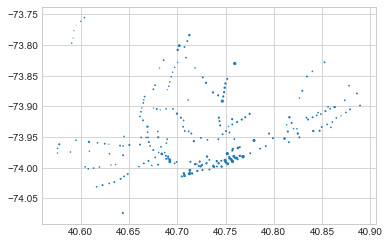

In [15]:
plt.scatter(data_by_loc['latitude'],data_by_loc['longitude'],s=std_entries)

    rain day_week      tempi
0      0      Fri  63.398265
1      0      Mon  63.529844
2      0      Sat  64.867586
3      0      Sun  62.403139
4      0      Thu  61.558609
5      0      Tue  68.316086
6      0      Wed  66.295660
7      1      Fri  60.342710
8      1      Mon  59.077083
9      1      Sat  59.359940
10     1      Sun  61.650554
11     1      Thu  64.930881
12     1      Tue  55.614608
13     1      Wed  56.613504


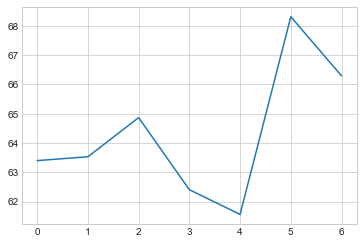

In [16]:
rain_temp = rain_df['tempi'].mean()
norain_t = rain_temp[0:7]
rain_t = rain_temp[7:14]
print(rain_temp)
plt.plot(norain_t['tempi'])

    rain day_week      tempi
7      1      Fri  60.342710
8      1      Mon  59.077083
9      1      Sat  59.359940
10     1      Sun  61.650554
11     1      Thu  64.930881
12     1      Tue  55.614608
13     1      Wed  56.613504


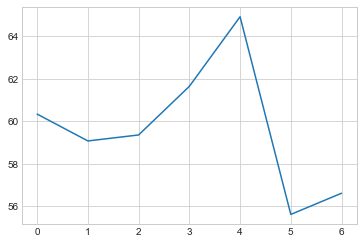

In [17]:
print(rain_t)
plt.plot(range(0,7),rain_t['tempi'])

In [18]:
data_by_prep = subway_data.groupby('precipi')

In [19]:
subway_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42649 entries, 0 to 42648
Data columns (total 28 columns):
UNIT               42649 non-null object
DATEn              42649 non-null object
TIMEn              42649 non-null object
ENTRIESn           42649 non-null int64
EXITSn             42649 non-null int64
ENTRIESn_hourly    42649 non-null float64
EXITSn_hourly      42649 non-null float64
datetime           42649 non-null object
hour               42649 non-null int64
day_week           42649 non-null object
weekday            42649 non-null int64
station            42649 non-null object
latitude           42649 non-null float64
longitude          42649 non-null float64
conds              42649 non-null object
fog                42649 non-null int64
precipi            42649 non-null float64
pressurei          42649 non-null float64
rain               42649 non-null int64
tempi              42649 non-null float64
wspdi              42649 non-null float64
meanprecipi        42649 non

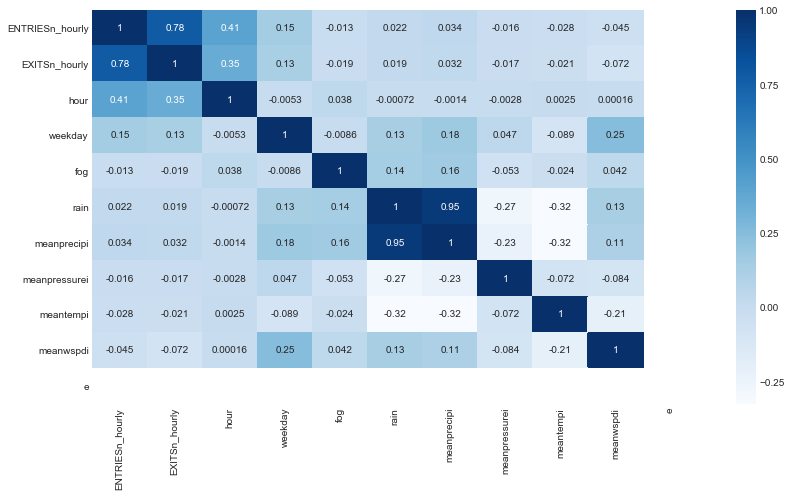

In [20]:
plt.figure(figsize=(12,7))
sns.heatmap(subway_data.drop(labels='latitude longitude weather_lat weather_lon latitude longitude ENTRIESn EXITSn\
 precipi pressurei tempi wspdi'.split(),axis = 1)\
                             .corr(method='spearman'), cmap='Blues', annot=True)
plt.tight_layout()

In [21]:
# Rain Distribution
rain_days = subway_data[['rain','day_week','e']]
rain_days.head()

,rain,day_week,e
0,0,Sun,1
1,0,Sun,1
2,0,Sun,1
3,0,Sun,1
4,0,Sun,1


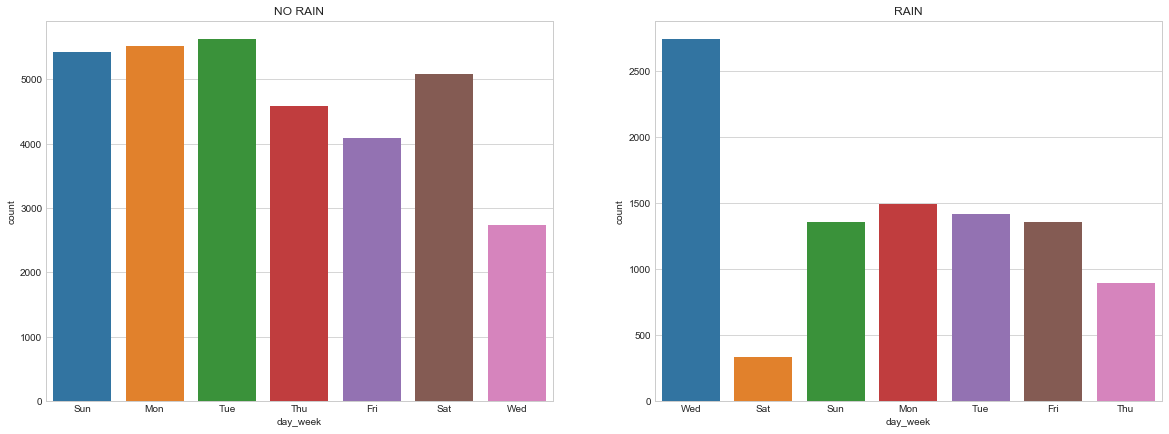

In [22]:
fig, axs = plt.subplots(ncols=2,figsize = (20,7))
plt.tight_layout
sns.countplot(x= 'day_week',data= rain_days[rain_days['rain'] == 0],ax = axs[0])
axs[0].title.set_text('NO RAIN')
sns.countplot(x= 'day_week',data= rain_days[rain_days['rain'] == 1],ax = axs[1])
axs[1].title.set_text('RAIN')